# 3. Output Overview

By the end of the notebook, you will have run a grid of Schwarzschild models. This will involve the following steps:
1. run a small grid of orbit-based models with DYNAMITE
2. understand the structure of the output
3. plot the output
4. look at the iteration process while running the grid of models

You should run this from the directory ``docs/tutorial_notebooks``.

## Setup

We will run DYNAMITE on CALIFA data of NGC 6278. To prepare the input data files, you should first run the tutorial "Data Preparation for Gauss Hermite kinematics" (``data_prep_for_gauss_hermites.ipynb``). The relevant files you need for this tutorial are:

```
| tutorial_notebooks
| ├── NGC6278_input     
| │   ├── dynamite_input                
| │   │   ├── gauss_hermite_kins.ecsv
| │   │   ├── aperture.dat
| │   │   ├── bins.dat 
| │   │   ├── mge.ecsv
| │   │   └── ...
| │   └── ...
| │   └── ...
| └── NGC6278_config.yaml
| └── *.ipynb
|
```

## Read the configuration file 

In [1]:
import dynamite as dyn

print('DYNAMITE')
print('    version', dyn.__version__)
print('    installed at ', dyn.__path__)

fname = 'NGC6278_config.yaml'
c = dyn.config_reader.Configuration(fname, reset_logging=True)

[INFO] 11:56:41 - dynamite.config_reader.Configuration - Config file NGC6278_config.yaml read.
[INFO] 11:56:41 - dynamite.config_reader.Configuration - io_settings...
[INFO] 11:56:41 - dynamite.config_reader.Configuration - Output directory tree: NGC6278_output/.
[INFO] 11:56:41 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 11:56:41 - dynamite.config_reader.Configuration - model_components...


DYNAMITE
    version 2.0.0
    installed at  ['/Users/leahskusa/Desktop/uni/dynamics_assistant/dynamite/dynamite_test/DYN_TEST/lib/python3.9/site-packages/dynamite-2.0.0-py3.9.egg/dynamite']


[INFO] 11:56:42 - dynamite.config_reader.Configuration - system_parameters...
[INFO] 11:56:42 - dynamite.config_reader.Configuration - orblib_settings...
[INFO] 11:56:42 - dynamite.config_reader.Configuration - weight_solver_settings...
[INFO] 11:56:42 - dynamite.config_reader.Configuration - Will attempt to recover partially run models.
[INFO] 11:56:42 - dynamite.config_reader.Configuration - parameter_space_settings...
[INFO] 11:56:42 - dynamite.config_reader.Configuration - multiprocessing_settings...
[INFO] 11:56:42 - dynamite.config_reader.Configuration - ... using 4 CPUs for orbit integration.
[INFO] 11:56:42 - dynamite.config_reader.Configuration - ... using 4 CPUs for weight solving.
[INFO] 11:56:42 - dynamite.config_reader.Configuration - legacy_settings...
[INFO] 11:56:42 - dynamite.config_reader.Configuration - System assembled
[INFO] 11:56:42 - dynamite.config_reader.Configuration - Configuration validated
[INFO] 11:56:42 - dynamite.config_reader.Configuration - Instantiate

All the options in the configuration file are held in the object `c`. For example, let's look at the `io_settings`. Output from this tutorial will be saved in the `output_directory`.

In [2]:
# delete previous output if available
c.remove_existing_orblibs()
c.remove_existing_all_models_file(wipe_other_files=False)
c.backup_config_file(keep=3, delete_other=True)

[INFO] 11:56:42 - dynamite.config_reader.Configuration - Model output tree NGC6278_output/models/ removed.
[INFO] 11:56:42 - dynamite.config_reader.Configuration - Deleted existing NGC6278_output/all_models.ecsv.
[INFO] 11:56:42 - dynamite.model.AllModels - No previous models (file NGC6278_output/all_models.ecsv) have been found: Making an empty table in AllModels.table
[INFO] 11:56:42 - dynamite.config_reader.Configuration - Instantiated empty AllModels object
[INFO] 11:56:42 - dynamite.config_reader.Configuration - Config file backup: NGC6278_output/NGC6278_config_001.yaml.


In [3]:
c.settings.io_settings

{'input_directory': 'NGC6278_input/dynamite_input/',
 'output_directory': 'NGC6278_output/',
 'all_models_file': 'all_models.ecsv',
 'model_directory': 'NGC6278_output/models/',
 'plot_directory': 'NGC6278_output/plots/'}

In fact, by creating the configuration object `c`, we have also created the `output_directory` and copied a version of the configuration file there,

In [4]:
ls NGC6278_output

NGC6278_config_000.yaml  NGC6278_config_001.yaml  plots/


## Run the models

Making the `ModelIterator` object will start running a grid of orbit-based models. This next step will take about 5-10 minutes using 4 cpus  

In [5]:
import time

t = time.perf_counter()

smi = dyn.model_iterator.ModelIterator(config=c)

delta_t = time.perf_counter()-t
print(f'Computation time: {delta_t} seconds = {delta_t/60} minutes')

[INFO] 11:56:53 - dynamite.model_iterator.ModelIterator - LegacyGridSearch: "iteration 0"
[INFO] 11:56:53 - dynamite.parameter_space.LegacyGridSearch - LegacyGridSearch added 1 new model(s) out of 1
[INFO] 11:56:53 - dynamite.model_iterator.ModelInnerIterator - ... running model 1 out of 1
[INFO] 11:56:53 - dynamite.orblib.LegacyOrbitLibrary - Calculating initial conditions
[INFO] 11:58:34 - dynamite.orblib.LegacyOrbitLibrary - ...done - cmd_orb_start exit code 0. Logfile: NGC6278_output/models/orblib_000_000/datfil/orbstart.log.
[INFO] 11:58:34 - dynamite.orblib.LegacyOrbitLibrary - Integrating orbit library tube orbits
[INFO] 11:58:49 - dynamite.orblib.LegacyOrbitLibrary - ...done - cmd_tube_orbs exit code 0. Logfiles: NGC6278_output/models/orblib_000_000/datfil/orblib.log, NGC6278_output/models/orblib_000_000/datfil/triaxmass.log, NGC6278_output/models/orblib_000_000/datfil/triaxmassbin.log.
[INFO] 11:58:49 - dynamite.orblib.LegacyOrbitLibrary - Integrating orbit library box orbits


[INFO] 12:01:56 - dynamite.plotter.Plotter - kinchi2 vs. model id plot created (5 models).
[INFO] 12:01:56 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/kinchi2_progress_plot.png saved in NGC6278_output/plots/
[INFO] 12:01:56 - dynamite.plotter.Plotter - Making chi2 plot scaled according to kinchi2
[INFO] 12:01:57 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/kinchi2_plot.png saved in NGC6278_output/plots/
[INFO] 12:01:57 - dynamite.plotter.Plotter - Plotting kinematic maps for 1 kin_sets.
[INFO] 12:01:57 - dynamite.plotter.Plotter - Plotting kinematic maps for kin_set no 0: califa
/Users/leahskusa/Desktop/uni/dynamics_assistant/dynamite/dynamite_test/DYN_TEST/lib/python3.9/site-packages/plotbin-3.1.3-py3.9.egg/plotbin/sauron_colormap.py:105: UserWarning: Trying to register the cmap 'sauron' which already exists.
/Users/leahskusa/Desktop/uni/dynamics_assistant/dynamite/dynamite_test/DYN_TEST/lib/python3.9/site-packages/plotbin-3.1.3-py3.9.egg/plotbin/sauron_colormap.p

Computation time: 512.4313896360001 seconds = 8.540523160600001 minutes


The following files have been created in the models directory,

In [6]:
ls NGC6278_output/models

orblib_000_000/ orblib_001_000/ orblib_001_001/ orblib_003_000/


Each directory holds a different orbit library 

    orblib_XXX_YYY

where `XXX` labels the iteration when it was created, and `YYY` labels the position within that iteration. Looking inside one of these directories, we see the following files:

In [7]:
ls NGC6278_output/models/orblib_000_000

cmd_box_orbs   cmd_nnls_9.0   datfil/        interpolgrid   ml9.00/
cmd_nnls_1.0   cmd_orb_start  fort.30        ml1.00/
cmd_nnls_5.0   cmd_tube_orbs  infil/         ml5.00/


which are:

- `cmd_*`: bash scripts for running Fortran programs
- `datfil/`: directory holding the orbit library for the reference potential
- `infil/`: input files for running Fortran programs
- `ml*/`: directories containing output orbital weights (and other results) for different values of `ml`

Each `ml*` directory hold outputs for a re-scaled version of the same potential, where the value of `ml` is a mass scaling applied to a reference potential. The reference potential uses the the first value of `ml` encountered in the parameter search.

Some plots are automatically created,

In [8]:
ls NGC6278_output/plots

anisotropy_var.png         kinchi2_progress_plot.png
betaz_var.png              kinematic_map_califa.png
chi2_plot.png              orbit_linear_only.png
enclosedmassm_linear.png   triaxial_qpt.png
kinchi2_plot.png


and they represent the following quantities:

1. `kinchi2_progress_plot` : chi2 values vs model ID
<img src="NGC6278_output/plots/kinchi2_progress_plot.png" width="400">

2. `kinchi2_progress_plot` : model parameters vs chi2 values. If more than 2 paramters were left free, this would be a traingle plot of chi2 values,
<img src="NGC6278_output/plots/kinchi2_plot.png" width="400">

3. `kinematic_map_califa.png` : the kinematic maps for the current minimum-chi2 model
<img src="NGC6278_output/plots/kinematic_map_califa.png" width="800">

A summary of all the models run so far is saved in the file `NGC6278_output/all_models.ecsv`. This is an Astropy ECSV file. A table holding this data is stored in `c`, 

In [9]:
c.all_models.table

m-bh,a-bh,c-dh,f-dh,q-stars,p-stars,u-stars,ml,chi2,kinchi2,time_modified,orblib_done,weights_done,all_done,which_iter,directory
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,bool,bool,bool,int64,object
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,5.0,36462.868022611096,16324.463672392096,2022-05-05T09:59:08.000,True,True,True,0,orblib_000_000/ml5.00/
100000.0,0.001,8.0,3.1622776601683795,0.54,0.99,0.9999,5.0,35574.415511568084,17097.674273545228,2022-05-05T10:01:47.000,True,True,True,1,orblib_001_000/ml5.00/
100000.0,0.001,8.0,31.622776601683793,0.54,0.99,0.9999,5.0,37813.298172027826,16009.427449646544,2022-05-05T10:01:47.000,True,True,True,1,orblib_001_001/ml5.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,1.0,496485.33015648247,361077.514508295,2022-05-05T10:01:56.000,True,True,True,1,orblib_000_000/ml1.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,9.0,57060.051662162434,35834.60158094985,2022-05-05T10:01:56.000,True,True,True,1,orblib_000_000/ml9.00/
100000.0,0.001,8.0,31.622776601683793,0.54,0.99,0.9999,1.0,480137.15078561887,345603.054196454,2022-05-05T10:02:16.000,True,True,True,2,orblib_001_001/ml1.00/
100000.0,0.001,8.0,31.622776601683793,0.54,0.99,0.9999,9.0,60138.76034988138,39254.297841572414,2022-05-05T10:02:16.000,True,True,True,2,orblib_001_001/ml9.00/
100000.0,0.001,8.0,17.78279410038923,0.54,0.99,0.9999,5.0,55173.95784578007,17192.77132122081,2022-05-05T10:05:03.000,True,True,True,3,orblib_003_000/ml5.00/
100000.0,0.001,8.0,31.622776601683793,0.54,0.99,0.9999,3.0,77632.85792723091,50532.39174578988,2022-05-05T10:05:12.000,True,True,True,3,orblib_001_001/ml3.00/


At this stage, you could:
    
- run more models, perhaps first adjusting settings in the configuration file, as explained in `2_quickstart.ipynb`,
    - increasing the `n_max_mods` and/or `n_max_iter`
    - adjust parameter bounds and/or which parameters are kept free
- plot other visualisations

## Plotting 

DYNAMITE provides other plotting methods in the `Plotter`:

In [11]:
plotter = dyn.plotter.Plotter(config=c)

In all the functions that require to use the values of the $\chi^2$ to make the plots, the user can choose which $\chi^2$ to use, by specifying the value of the parameter ``which_chi2``. The recommended value to use is ``which_chi2='kinchi2'``. 

The plots produced by the functions introduced below are all saved in the plot directory specified in the directory ``plots`` within the output directory specified in the configuration file. After running all the cells in this notebook, you will find your plots in the directory ``NGC6278_output/plots``.

The ``mass_plot`` function generates a cumulative mass plot, showing the enclosed mass profiles for the mass-follows-light component (red), for the dark matter (blue), and for the sum of the two (black). The solid lines correspond to the best-fit model, the shaded areas represent 1 sigma uncertainties. You can specify the radial extent of the plot and the type of file you want to be saved with the figure (e.g., ``'.png'``, ``'.pdf'``, ... if ``figtype=None``, the default is used and a ``'.png'`` figure is created).

Selecting  10  models


[INFO] 12:08:37 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/enclosedmassm_linear.png saved in NGC6278_output/plots/


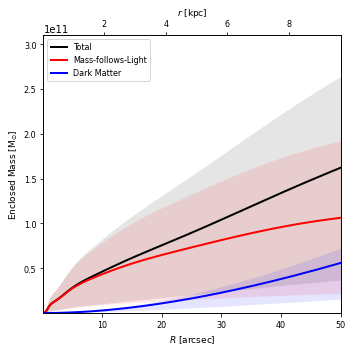

In [12]:
fig1 = plotter.mass_plot(which_chi2='kinchi2', Rmax_arcs=50, figtype=None)

The ``orbit_plot`` function generates a plot showing the stellar orbit distribution, described as probability density of orbits; circularity ($\lambda_z$) is represented here as a function of the distance from the galactic centre r (in arcsec). You can specify the type of file you want to be saved with the figure (e.g., ``'.png'``, ``'.pdf'``, ...). In this case, ``Rmax_arcs`` represents the upper radial limit for orbit selection, in arcsec, meaning that only orbits extending up to ``Rmax_arcs`` are plotted.

[INFO] 12:08:38 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/orbit_linear_only.png saved in NGC6278_output/plots/


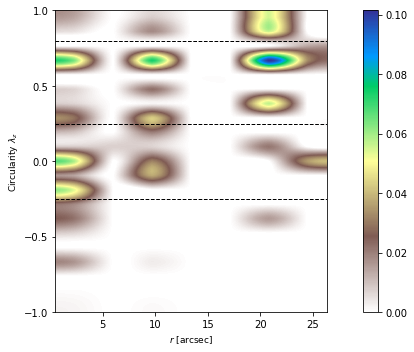

In [13]:
fig2 = plotter.orbit_plot(Rmax_arcs=50)

The ``beta_plot`` function generates two plots, showing the intrinsic and projected anisotropy profiles.

[INFO] 12:08:42 - dynamite.plotter.Plotter - Figure NGC6278_output/plots/anisotropy_var.png saved in NGC6278_output/plots/
[INFO] 12:08:42 - dynamite.plotter.Plotter - Figure NGC6278_output/plots/betaz_var.png saved in NGC6278_output/plots/


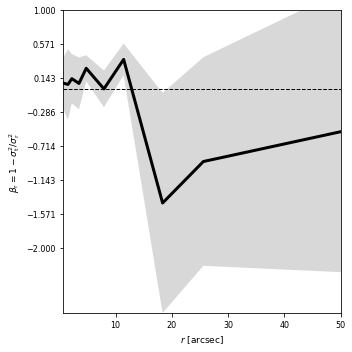

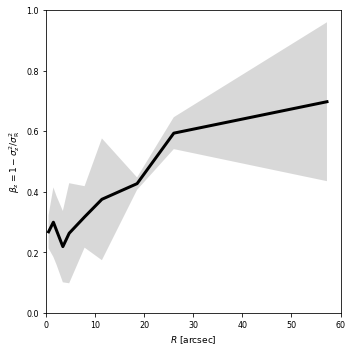

In [14]:
fig3, fig4 = plotter.beta_plot(which_chi2='kinchi2', Rmax_arcs=50)

The ``qpu_plot`` function creates a plot showing the intrinsic flattenings $q$ and $p$, with the blue and black lines respectively, as a function of the distance from the galactic centre (in arcsec). The value of $T = (1-p^2)/(1-q^2)$ is also shown (red line).

[INFO] 12:08:43 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/triaxial_qpt.png saved in NGC6278_output/plots/


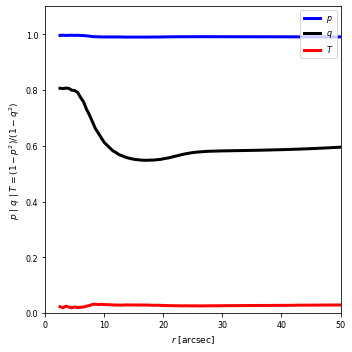

In [15]:
fig5 = plotter.qpu_plot(which_chi2='kinchi2', Rmax_arcs=50,figtype =None)

## The Iteration Process

We will now have a look at the iteration process by examining the $\chi^2$-value.

In the table above (`c.all_models.table`), the model parameters are given for each step of the iteration. Most parameters are fixed and therefore constant, but the mass-to-light ratio `ml` and the dark matter parameter `f-dh` are free. We will examine how these parameters are changed with each iteration.


First, we get the upper and lower limits of the parameters from the configuration file (for more details on this step have a look at the notebook `parameter_space.ipynb`):

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# extract the lo/hi limits for the two free parameters f and ml

f = c.parspace.get_parameter_from_name('f-dh')
f_lims_raw = [f.par_generator_settings['lo'], f.par_generator_settings['hi']]
f_lims = [f.get_par_value_from_raw_value(lim0) for lim0 in f_lims_raw]

ml = c.parspace.get_parameter_from_name('ml')
ml_lims_raw = [ml.par_generator_settings['lo'], ml.par_generator_settings['hi']]
ml_lims = [ml.get_par_value_from_raw_value(lim0) for lim0 in ml_lims_raw]

From the table, we can get a list of all iterations that were made:

In [17]:
# get list of iterations
iterations = np.unique(c.all_models.table['which_iter'])

Now plot the $\chi^2$-value of the models for every iteration:

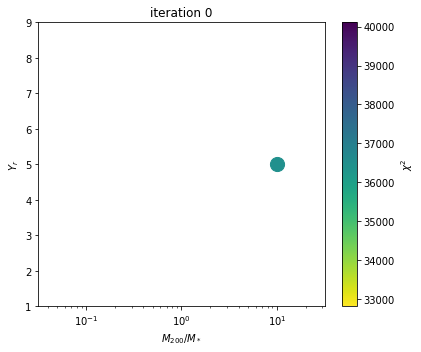

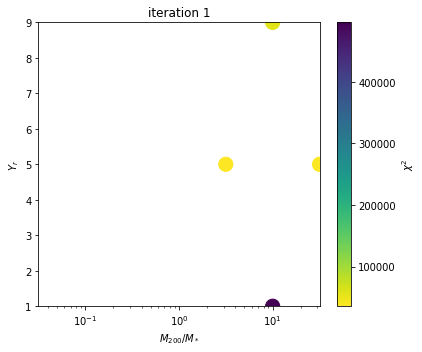

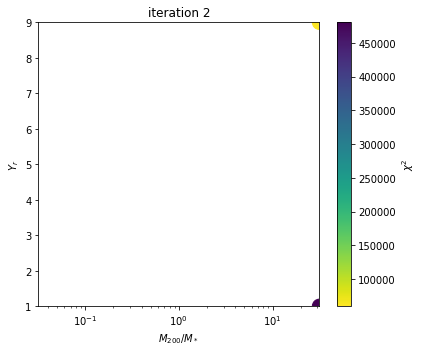

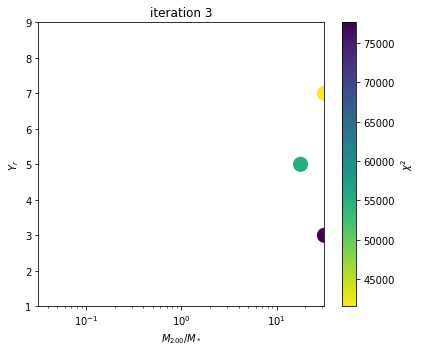

In [18]:
# plot chi2 of models vs iterations
for iter0 in iterations:
    table = c.all_models.table
    table = table[table['which_iter']==iter0]
    plt.figure(figsize=(6,5))
    plt.scatter(table['f-dh'],
                table['ml'],
                c=table['chi2'],
                cmap=plt.cm.viridis_r,
                s=200)
    
    
    cbar = plt.colorbar()
    cbar.set_label('$\chi^2$')
    plt.gca().set_title(f'iteration {iter0}')
    
    plt.gca().set_xlim(*f_lims)
    plt.gca().set_ylim(*ml_lims)
    plt.gca().set_xlabel(f.LaTeX)
    plt.gca().set_ylabel(ml.LaTeX)
    plt.gca().set_xscale('log')
    plt.tight_layout()
    plt.show()

We can see how the parameter values get closer together for each iteration. The next plot gives an overview over all iterations:

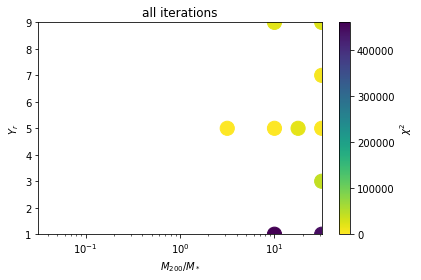

In [19]:
# plot the models: f-dh vs ml altogether
plt.scatter(c.all_models.table['f-dh'],
            c.all_models.table['ml'],
            c=c.all_models.table['chi2'] - np.min(c.all_models.table['chi2']),
            cmap=plt.cm.viridis_r,
            s=200)
cbar = plt.colorbar()
cbar.set_label('$\chi^2$')
plt.gca().set_title(f'all iterations')
plt.gca().set_xlim(*f_lims)
plt.gca().set_ylim(*ml_lims)
plt.gca().set_xlabel(f.LaTeX)
plt.gca().set_ylabel(ml.LaTeX)
plt.gca().set_xscale('log')
plt.tight_layout()
plt.show()

We can see how with every iteration, the $\chi^2$-value becomes smaller, as does the scatter between the values.

The plot `kinchi2_progress_plot` already shown above is another representation of the iteration process. The different models are plotted on a grid in the parameter space, where the best fit model is marked with a cross.

<img src="NGC6278_output/plots/kinchi2_plot.png" width="400">